In [572]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [573]:
movie_df = pd.read_csv('tmdb-movies.csv')

In [574]:
movie_df.shape

(10866, 21)

In [575]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [576]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [577]:
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


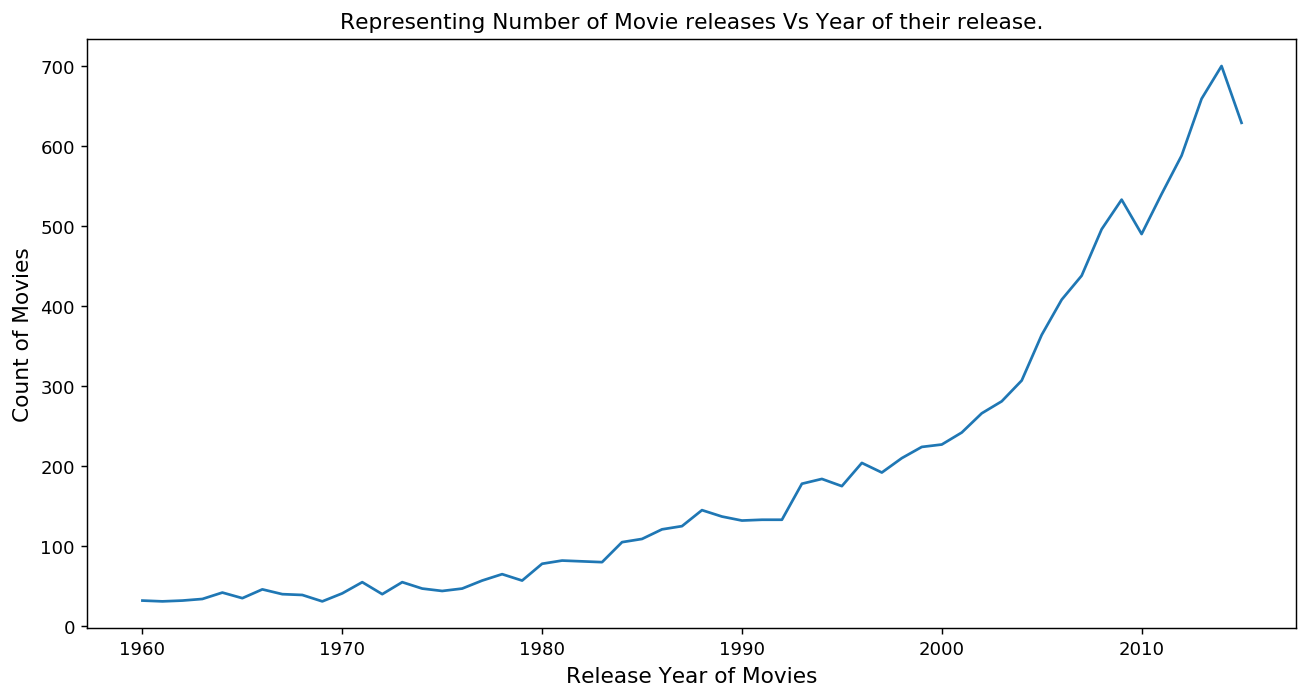

In [578]:
stats = movie_df.groupby('release_year')['id'].count()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Count of Movies', fontsize = 12)
plt.title('Representing Number of Movie releases Vs Year of their release.')

plt.plot(stats)

In [579]:
movie_df.drop(columns=['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
movie_df.shape

(10866, 15)

In [580]:
movie_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [581]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [582]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [583]:
movie_df[movie_df.cast.isna()].head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,NaN,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,NaN,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,manipulation|politics|war|control|fear,135,Documentary,BBC,1/24/15,19,7.8,2015
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,mustang|car|corporation|henry ford family|car ...,90,Documentary,NaN,10/8/15,12,8.0,2015
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,feminism|sexism|young boy|gender roles|misogyny,88,Documentary,NaN,1/1/15,11,8.9,2015


In [584]:
movie_df[movie_df.cast.isna()].count()

id                      76
popularity              76
budget                  76
revenue                 76
original_title          76
cast                     0
director                70
keywords                45
runtime                 76
genres                  75
production_companies    36
release_date            76
vote_count              76
vote_average            76
release_year            76
dtype: int64

In [585]:
movie_df.dropna(subset = ['cast'], inplace=True)

In [586]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 15 columns):
id                      10790 non-null int64
popularity              10790 non-null float64
budget                  10790 non-null int64
revenue                 10790 non-null int64
original_title          10790 non-null object
cast                    10790 non-null object
director                10752 non-null object
keywords                9328 non-null object
runtime                 10790 non-null int64
genres                  10768 non-null object
production_companies    9800 non-null object
release_date            10790 non-null object
vote_count              10790 non-null int64
vote_average            10790 non-null float64
release_year            10790 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


In [587]:
movie_df[movie_df.director.isna()].head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,stand-up|stand up comedy|aftercreditsstinger|d...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,sexuality|superhuman|superpower|making of|soci...,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,wedding,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,superhero|marvel cinematic universe,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,NaN,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014


In [588]:
movie_df.dropna(subset = ['cast', 'director', 'genres'], inplace=True)
movie_df.drop_duplicates(inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


In [589]:
movie_df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [590]:
movie_df.query('budget==0').head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,4/17/15,81,5.5,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015


In [591]:
movie_df.query('budget==0').groupby('budget').count()['id']

budget
0    5578
Name: id, dtype: int64

In [592]:
movie_df['budget'].replace(0, np.NaN, inplace=True)
movie_df['revenue'].replace(0, np.NaN, inplace=True)
movie_df['runtime'].replace(0, np.NaN, inplace=True)

In [593]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10703 non-null float64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(5), int64(3), object(7)
memory usage: 1.3+ MB


In [594]:
stats = movie_df.groupby('release_year')['id'].count()

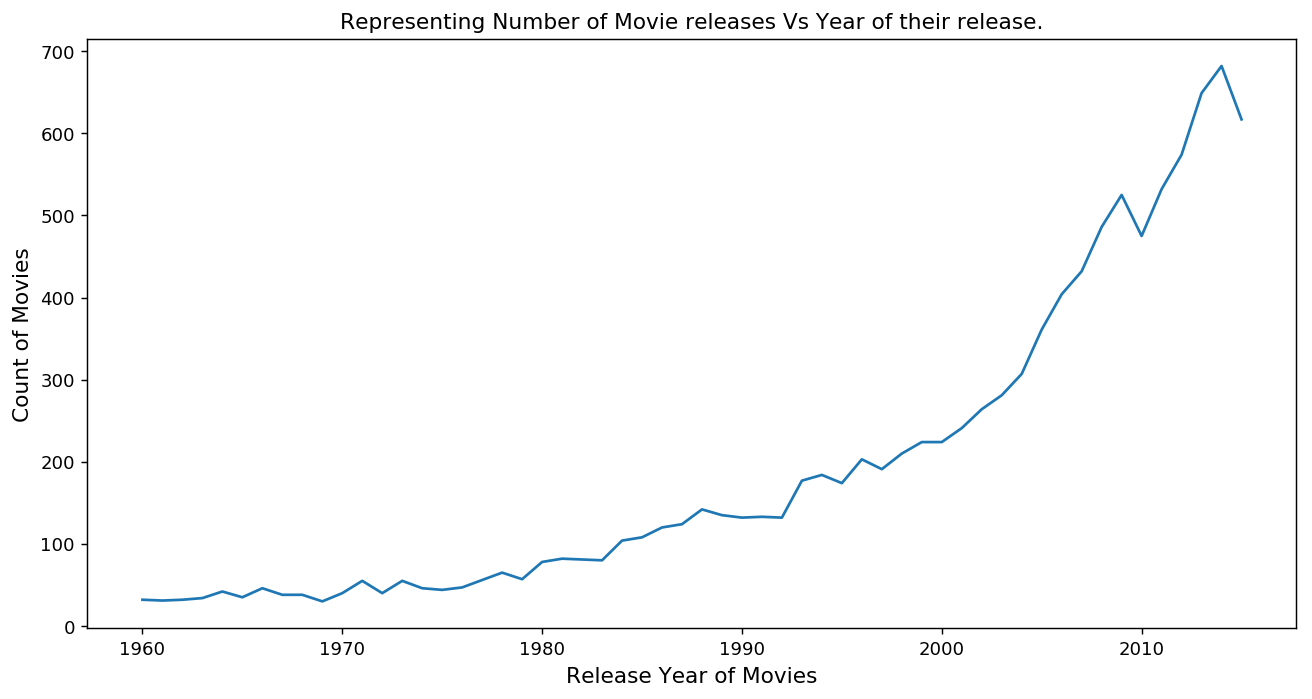

In [595]:
plt.figure(figsize=(12,6), dpi = 130)
#on x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#on y-axis
plt.ylabel('Count of Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Number of Movie releases Vs Year of their release.')

plt.plot(stats)

In [596]:
def highest(column):
    index = movie_df[column].idxmax
    info = pd.DataFrame(movie_df.loc[index])
    return info

In [597]:
def lowest(column):
    index = movie_df[column].idxmin
    info = pd.DataFrame(movie_df.loc[index])
    return info

In [598]:
highest('budget')

,2244
id,46528
popularity,0.25054
budget,4.25e+08
revenue,1.10876e+07
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
keywords,assassin|small town|revenge|deception|super speed
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller


In [599]:
lowest('budget')

,1151
id,287524
popularity,0.177102
budget,1
revenue,NaN
original_title,Fear Clinic
cast,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Robert Hall
keywords,phobia|doctor|fear
runtime,95
genres,Horror


In [600]:
movie_df.groupby('director')['id'].count()

director
 FrÃ©dÃ©ric Jardin                                    1
A. Todd Smith                                         1
A.R. Murugadoss                                       1
Aaron Aites                                           1
Aaron Blaise|Robert Walker                            1
Aaron Hann|Mario Miscione                             1
Aaron Harvey                                          1
Aaron Katz|Martha Stephens                            1
Aaron Keeling|Austin Keeling                          1
Aaron Moorhead|Justin Benson                          1
Aaron Norris                                          5
Aaron Schneider                                       1
Aaron Seltzer|Jason Friedberg                         1
Aaron Woodley                                         1
Abbas Alibhai Burmawalla|Mastan Alibhai Burmawalla    2
Abbas Kiarostami                                      2
Abbas Tyrewala                                        1
Abe Levy|Silver Tree                   

In [601]:
all_casts = movie_df['cast'].str.cat(sep='|')

In [602]:
all_cast_series = pd.Series(all_casts.split('|'))

In [603]:
type(all_cast_series)

pandas.core.series.Series

In [604]:
movie_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [605]:
def get_profitable_series(column):
    concat_str = movie_df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

In [606]:
def divide_quartile_segment(column, bin_names):
    series = movie_df[column].describe()
    bin_edges = [int(series['min']), int(series['25%']), int(series['50%']), int(series['75%']), int(series['max'])]
    movie_df['{}_levels'.format(column)] = pd.cut(movie_df[column], bin_edges, labels=bin_names, include_lowest = True)

### Trial

In [607]:
def get_series(df, column):
    concat_str = df[column].str.cat(sep='|')
    series = pd.Series(concat_str.split('|'))
    return series

In [608]:
groupby_release_year = movie_df.groupby(['release_year'])

In [609]:
groupby_release_year_1960   = groupby_release_year.get_group(1960)
df = get_series(groupby_release_year_1960, 'genres').value_counts().reset_index()
df.head()

,index,0
0,Drama,13
1,Action,8
2,Comedy,8
3,Horror,7
4,Thriller,6


In [610]:
df.columns

Index(['index', 0], dtype='object')

In [611]:
df.rename(columns={'index':'genre', 0:'count'}, inplace=True)
df.head()

,genre,count
0,Drama,13
1,Action,8
2,Comedy,8
3,Horror,7
4,Thriller,6


In [612]:
groupby_release_year = movie_df.groupby(['release_year'])

In [613]:
main_df = pd.DataFrame(columns=['genre', 'count'])
main_df

,genre,count


In [614]:
main_df = pd.DataFrame(columns=['genre', 'count'])
for name, group in groupby_release_year:
    df = get_series(groupby_release_year.get_group(name), 'genres').value_counts().reset_index()
    new_count_name = '{}_count'.format(name)
    df.rename(columns={'index':'genre', 0:new_count_name}, inplace=True)
    #print (df.head())
    main_df = main_df.merge(df, left_on='genre', right_on='genre', how='outer')
main_df.drop(columns=['count'], inplace=True)
main_df

,genre,1960_count,1961_count,1962_count,1963_count,1964_count,1965_count,1966_count,1967_count,1968_count,...,2006_count,2007_count,2008_count,2009_count,2010_count,2011_count,2012_count,2013_count,2014_count,2015_count
0,Drama,13.0,16.0,21.0,13.0,20.0,20.0,16.0,16.0,19.0,...,196,197,232,222.0,208,213,231,253.0,284.0,260.0
1,Action,8.0,7.0,8.0,4.0,5.0,9.0,14.0,7.0,6.0,...,79,94,98,108.0,106,115,99,119.0,129.0,106.0
2,Comedy,8.0,10.0,5.0,13.0,16.0,7.0,16.0,17.0,9.0,...,155,151,165,198.0,168,171,173,173.0,183.0,160.0
3,Horror,7.0,3.0,5.0,9.0,6.0,5.0,3.0,4.0,4.0,...,56,78,76,90.0,78,78,104,102.0,105.0,125.0
4,Thriller,6.0,NaN,7.0,10.0,9.0,11.0,8.0,5.0,5.0,...,114,123,127,157.0,133,146,160,175.0,178.0,171.0
5,Romance,6.0,7.0,5.0,8.0,9.0,5.0,6.0,11.0,6.0,...,70,74,83,83.0,84,75,79,65.0,83.0,56.0
6,Western,6.0,3.0,3.0,2.0,1.0,4.0,7.0,2.0,1.0,...,1,5,2,NaN,6,3,4,3.0,6.0,6.0
7,Adventure,5.0,6.0,7.0,7.0,5.0,6.0,11.0,7.0,5.0,...,55,60,63,71.0,58,61,50,65.0,67.0,69.0
8,History,5.0,3.0,4.0,4.0,3.0,4.0,2.0,NaN,3.0,...,12,12,23,16.0,14,8,12,14.0,15.0,15.0
9,Science Fiction,3.0,4.0,2.0,2.0,4.0,2.0,6.0,4.0,4.0,...,30,38,52,70.0,45,56,54,60.0,61.0,84.0


In [615]:
main_df.set_index('genre', inplace=True)
main_df.head()

,1960_count,1961_count,1962_count,1963_count,1964_count,1965_count,1966_count,1967_count,1968_count,1969_count,...,2006_count,2007_count,2008_count,2009_count,2010_count,2011_count,2012_count,2013_count,2014_count,2015_count
genre,,,,,,,,,,,,,,,,,,,,,
Drama,13.0,16.0,21.0,13.0,20.0,20.0,16.0,16.0,19.0,13.0,...,196,197,232,222.0,208,213,231,253.0,284.0,260.0
Action,8.0,7.0,8.0,4.0,5.0,9.0,14.0,7.0,6.0,10.0,...,79,94,98,108.0,106,115,99,119.0,129.0,106.0
Comedy,8.0,10.0,5.0,13.0,16.0,7.0,16.0,17.0,9.0,11.0,...,155,151,165,198.0,168,171,173,173.0,183.0,160.0
Horror,7.0,3.0,5.0,9.0,6.0,5.0,3.0,4.0,4.0,1.0,...,56,78,76,90.0,78,78,104,102.0,105.0,125.0
Thriller,6.0,NaN,7.0,10.0,9.0,11.0,8.0,5.0,5.0,3.0,...,114,123,127,157.0,133,146,160,175.0,178.0,171.0


In [620]:
main_df.loc['Drama']

1960_count     13.0
1961_count     16.0
1962_count     21.0
1963_count     13.0
1964_count     20.0
1965_count     20.0
1966_count     16.0
1967_count     16.0
1968_count     19.0
1969_count     13.0
1970_count     19.0
1971_count     30.0
1972_count     16.0
1973_count     31.0
1974_count     21.0
1975_count     17.0
1976_count     22.0
1977_count     23.0
1978_count     29.0
1979_count     30.0
1980_count     32.0
1981_count     32.0
1982_count     33.0
1983_count     35.0
1984_count     40.0
1985_count     39.0
1986_count     51.0
1987_count     52.0
1988_count     53.0
1989_count     54.0
1990_count     60.0
1991_count     63.0
1992_count     65.0
1993_count     90.0
1994_count     83.0
1995_count     93.0
1996_count    104.0
1997_count     83.0
1998_count    108.0
1999_count    113.0
2000_count    100.0
2001_count    100.0
2002_count    129.0
2003_count    110.0
2004_count    141.0
2005_count    182.0
2006_count    196.0
2007_count    197.0
2008_count    232.0
2009_count    222.0
